<a href="https://colab.research.google.com/github/DongHyukShin93/BigData/blob/main/210615_02_%EC%9A%B0%EB%A6%AC_%EB%8F%99%EB%84%A4(%EC%98%81%EB%8D%95%EB%8F%99)_%EC%9D%B8%EA%B5%AC_%EA%B5%AC%EC%A1%B0_%EC%8B%9C%EA%B0%81%ED%99%94%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


959
2
[37, 39]
[97]


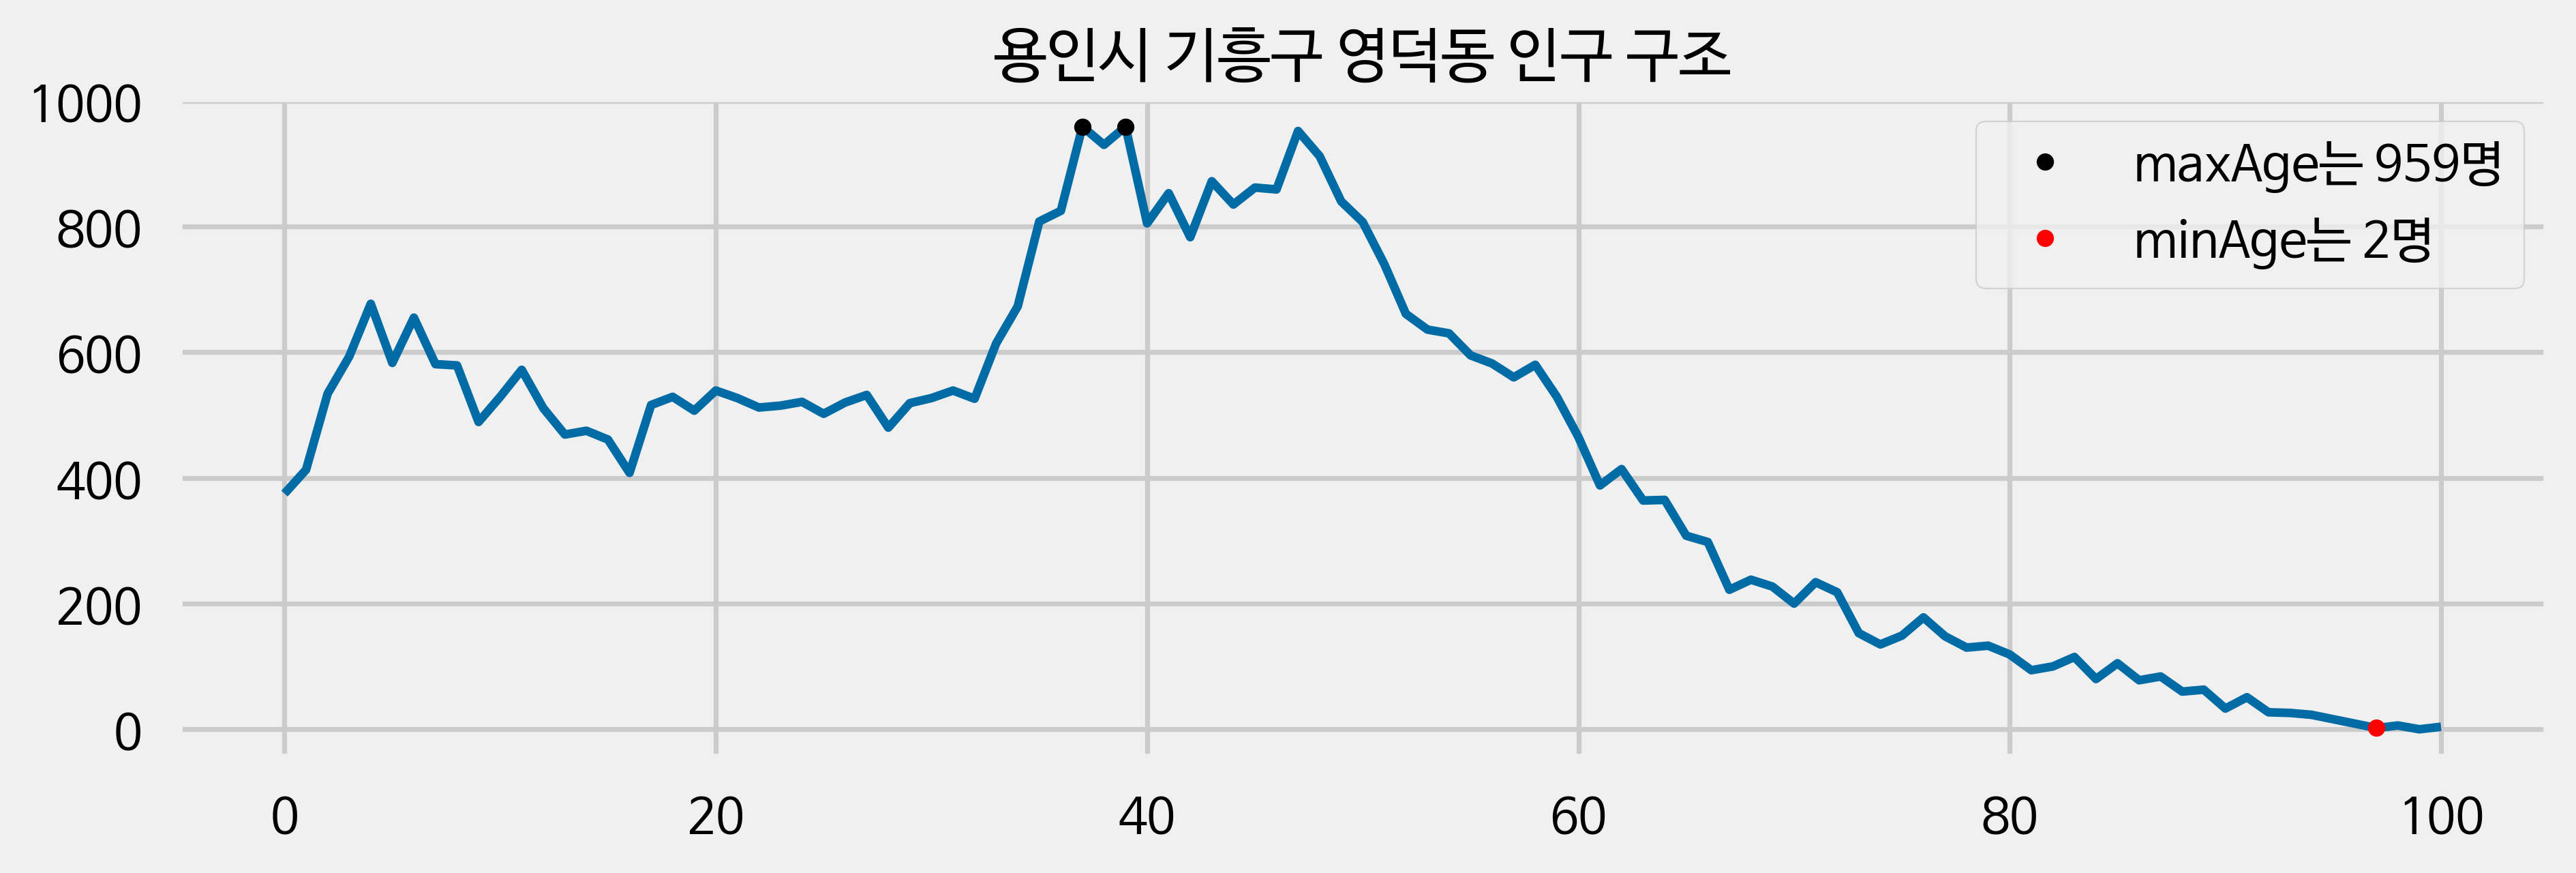

In [ ]:
# 라이브러리 불러오기
import csv

# 파일 열기
f = open("/content/age.csv", encoding="cp949")
data = csv.reader(f)
# next(data) # 헤더 넘기기

result = []

for row in data :
  if '영덕동' in row[0] :
    for i in row[3:] :
      result.append(int(i)) # int() 정수형으로 바꾼 후에 result 리스트에 담기
      # 만약 인구 수 가 1000을 넘으면 1,000 이런 형태로 표현이 되어서 i.replace(',','')를 통해 ,(콤마)를 제거해야 한다

# result 최고값 구하기
maxAge = -1 # 인구 수가 0일 수는 있어도 음수일 수는 없기 때문에 -1로 설정
for i in result :
  if i > maxAge :
    maxAge = i
print(maxAge)

# result 최저값 구하기
minAge = 60000000 # 우리나라 인구 수가 5천만이기 때문에 60000000(6천만)으로 설정
for h in result :
  if h != 0 : # 인구 수가 0명은 제외
    if h < minAge :
      minAge = h
print(minAge)

# 최고값 index 구하기
# for j in range(len(result)) :
#   if result[j] == 959 :
maxAgeList = [j for j in range(len(result)) if result[j] == maxAge]
print(maxAgeList)

# 최저값 index 구하기
minAgeList = [k for k in range(len(result)) if result[k] == minAge]
print(minAgeList)

# 차트 설정
plt.figure(figsize=(10,3), dpi=200) # 해상도 조절
plt.style.use('seaborn-talk') # 격자 무늬 스타일로 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
# plot 차트 그리기
plt.plot(result)
plt.plot(maxAgeList, [maxAge, maxAge],'k.',label="maxAge는 %d명"%maxAge)
plt.plot(minAgeList, minAge,'r.',label="minAge는 %d명"%minAge)
plt.title('용인시 기흥구 영덕동 인구 구조')
plt.legend()
plt.show()